In [6]:
import torch
import torch.nn as nn

# Creating a simple 3x3 image with 3 channels and integer values between 0 and 5
# The shape of the tensor is [4, 3, 3], representing (channels, height, width)
image = torch.randint(0, 6, (4, 3, 3)).float()  # Convert to float for BatchNorm
print("Original Image:\n", image)

# Expanding the image tensor to simulate a batch of 1 image
# The shape after unsqueeze becomes [1, 4, 3, 3] -> (batch_size, channels, height, width)
batch = image.unsqueeze(0)

# Creating a BatchNorm layer for 4 channels
batchnorm = nn.BatchNorm2d(4)  # num_features is 4, corresponding to the 4 channels

# Passing the batch through BatchNorm
normalized_batch = batchnorm(batch)

print("\nNormalized Batch:\n", normalized_batch)


Original Image:
 tensor([[[0., 4., 5.],
         [2., 4., 2.],
         [1., 0., 0.]],

        [[1., 5., 5.],
         [1., 2., 2.],
         [4., 3., 5.]],

        [[0., 2., 2.],
         [1., 4., 5.],
         [1., 0., 2.]],

        [[1., 1., 4.],
         [4., 0., 2.],
         [2., 0., 5.]]])

Normalized Batch:
 tensor([[[[-1.0954,  1.0954,  1.6432],
          [ 0.0000,  1.0954,  0.0000],
          [-0.5477, -1.0954, -1.0954]],

         [[-1.3238,  1.1844,  1.1844],
          [-1.3238, -0.6967, -0.6967],
          [ 0.5574, -0.0697,  1.1844]],

         [[-1.1844,  0.0697,  0.0697],
          [-0.5574,  1.3238,  1.9508],
          [-0.5574, -1.1844,  0.0697]],

         [[-0.6428, -0.6428,  1.0928],
          [ 1.0928, -1.2214, -0.0643],
          [-0.0643, -1.2214,  1.6713]]]], grad_fn=<NativeBatchNormBackward0>)


In [ ]:
import torch
import torch.nn as nn

# Define a max pooling layer with a kernel size of 2x2.
max_pooling_layer = nn.MaxPool2d(kernel_size=2)

# Create a 2x2 PyTorch tensor from your input array.
input_array = torch.tensor([[2, 1], [3, 2]], dtype=torch.float32)

# Reshape the input to match the expected shape (batch size of 1 and 1 channel).
input_data = input_array.view(1, 1, 2, 2)

# Apply max pooling to the input data.
output_data = max_pooling_layer(input_data)

# Print the result.
print(output_data)

tensor([[[[3.]]]])


In [ ]:
# Create a 2x2 PyTorch tensor from your input array.
input_array = torch.tensor([[2, 1], [3, 2]], dtype=torch.float32)

# Reshape the input to match the expected shape (batch size of 1 and 1 channel).
input_data = input_array.view(4, 1)

print(input_data)

tensor([[2.],
        [1.],
        [3.],
        [2.]])


In [ ]:
import torch
import torch.nn as nn

# Define a 2D Batch Normalization layer.
batch_norm_layer = nn.BatchNorm2d(num_features=1)  # num_features is the number of input channels

# Create a 2x2 PyTorch tensor for demonstration.
input_data = torch.tensor([[2.0, 1.0], [1.0, 2.0]], dtype=torch.float32)
input_data = input_data.view(1, 1, 2, 2)  # Reshape to match the expected input shape.

# Apply batch normalization to the input data.
output_data = batch_norm_layer(input_data)

# Print the result.
print(output_data)

tensor([[[[ 1.0000, -1.0000],
          [-1.0000,  1.0000]]]], grad_fn=<NativeBatchNormBackward0>)


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

x = torch.tensor([[2,1,0], [0,3,1], [0,1,1]], dtype = torch.float32)
model = nn.Conv2d(1, 1, 2, 1)

# Define your desired kernel as a tensor
# The shape of the tensor should match (out_channels, in_channels, kernel_height, kernel_width)
kernel = torch.tensor([[[[1.0, 0.0],
                         [0.0, 1.0]]]])

# Assign your kernel to the weight of the convolutional layer
model.weight.data = kernel

# If you also want to set the bias to 0 (common when manually setting weights)
model.bias.data.fill_(0)

x = x.view(1, 3, 3)
y = model(x)

print(y)

y = F.max_pool2d(x, 2, 1)

print(y)


tensor([[[5., 2.],
         [1., 4.]]], grad_fn=<SqueezeBackward1>)
tensor([[[3., 3.],
         [3., 3.]]])


In [17]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.bn1 = nn.BatchNorm2d(32)  # Add BatchNorm after conv1
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.bn2 = nn.BatchNorm2d(64)  # Add BatchNorm after conv2
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        print(x.shape)
        x = self.bn1(x)  # Apply BatchNorm after conv1
        x = F.relu(x)
        x = self.conv2(x)
        print(x.shape)
        x = self.bn2(x)  # Apply BatchNorm after conv2
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        print(x.shape)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        # forward pass
        output = model(data)

        # compute the loss L
        loss = F.nll_loss(output, target)

        # compute dL / dparams
        loss.backward()

        # parameters are updated
        optimizer.step()

        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if args.dry_run:
                break


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [9]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 248391153.33it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115367327.45it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 82324200.04it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21333178.91it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [10]:
dataset2

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [25]:
x = torch.tensor([1,2,3])
x.unsqueeze(0).unsqueeze(2).squeeze(0).shape

torch.Size([3, 1])

In [18]:
import matplotlib.pyplot as plt

# Step 3: Select an image from the dataset
index = 1  # Choose the index of the image you want to plot
image, label = dataset1[index]

model = Net()
model(image.unsqueeze(0))

print(image.shape)

# Step 4: Use Matplotlib to display the image
plt.imshow(image.squeeze().numpy(), cmap='gray')  # Squeeze to remove the channel dimension
plt.title(f"Label: {label}")
plt.show()

torch.Size([1, 32, 26, 26])
torch.Size([1, 64, 24, 24])
torch.Size([1, 64, 12, 12])
torch.Size([1, 28, 28])


In [ ]:




parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                    help='input batch size for training (default: 64)')
parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                    help='input batch size for testing (default: 1000)')
parser.add_argument('--epochs', type=int, default=2, metavar='N',
                    help='number of epochs to train (default: 14)')
parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                    help='learning rate')
parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                    help='Learning rate step gamma (default: 0.7)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')
parser.add_argument('--no-mps', action='store_true', default=False,
                    help='disables macOS GPU training')
parser.add_argument('--dry-run', action='store_true', default=False,
                    help='quickly check a single pass')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='how many batches to wait before logging training status')
parser.add_argument('--save-model', action='store_true', default=False,
                    help='For Saving the current Model')
args = parser.parse_args(args=[])
use_cuda = True

torch.manual_seed(args.seed)

if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

train_kwargs = {'batch_size': args.batch_size}
test_kwargs = {'batch_size': args.test_batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=args.lr)

# Create a list to record learning rates
learning_rates = []

scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(1, args.epochs + 1):
    train(args, model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

    # Get the current learning rate from the optimizer
    current_lr = optimizer.param_groups[0]['lr']
    # Record the learning rate
    learning_rates.append(current_lr)

if args.save_model:
    torch.save(model.state_dict(), "mnist_cnn.pt")


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.393066
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.346881
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.057123
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.887413
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.845089
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.411135
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.127889
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.660015
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.632443
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.742737
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.938504
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.794232
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.873154
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.730100
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.869801
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.699180
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.776370
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.580077
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.772431
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.440605
Train Epoch: 1 [12800/60000 (

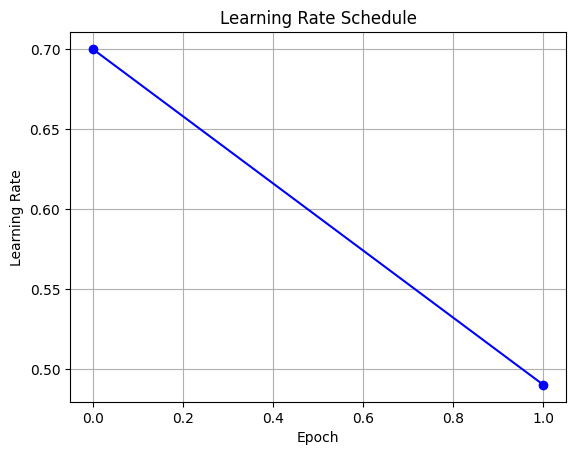

In [ ]:
# Plot the learning rate changes
plt.plot(learning_rates, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.show()